<a href="https://colab.research.google.com/github/JJJuniorDev/ML-colab/blob/main/sklearn_super_simple_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)

print(X.shape)
print(y.shape)


(20640, 8)
(20640,)


{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

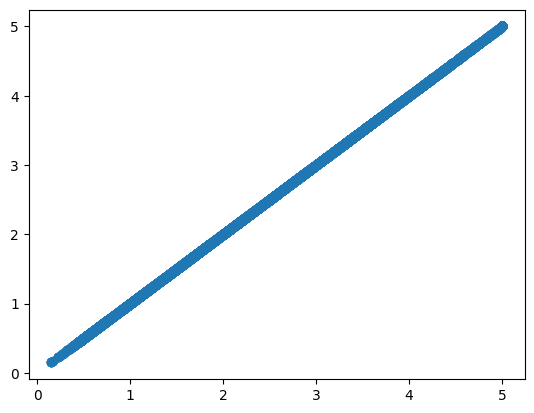

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
model= KNeighborsRegressor().fit(X,y)
pipe=Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipe.fit(X,y)
pred=pipe.predict(X)
plt.scatter(pred, y)
pipe.get_params()

In [22]:
#la nostra grid search usa la pipeline (che fa scale +modello)
#e con cv=3 testa/traina i dati su varie parti del dataset per ogni volta
mod=GridSearchCV(estimator=pipe,
             param_grid={'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10]},
             cv=3)

In [25]:
import pandas as pd
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032358,0.021887,0.531265,0.171846,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,10
1,0.019288,0.003260,0.389200,0.045773,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,9
2,0.015667,0.000459,0.378430,0.025234,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,8
3,0.017635,0.000481,0.407464,0.033134,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,7
4,0.015756,0.000607,0.458072,0.046518,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,6
5,0.017414,0.001474,0.445024,0.037182,6,{'model__n_neighbors': 6},0.558435,0.586185,0.521134,0.555251,0.026652,5
6,0.017703,0.001850,0.432820,0.036207,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
7,0.018429,0.002252,0.597913,0.217935,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
8,0.019326,0.004340,0.571199,0.134313,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
9,0.016637,0.001342,0.474456,0.035561,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1
